<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_02_discrete_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install filterpy

In [2]:
import math

import numpy as np

from matplotlib.pyplot import bar, plot
from matplotlib import pyplot as plt

from ipywidgets import fixed, interact
import ipywidgets as widgets

In [3]:
def plot_discrete_distribution(heights, title = ''):
  buckets = range(len(heights))
  bar(buckets, heights)
  plt.title(title)
  plt.show()

In [14]:
def normalize_discrete(heights):
  sum = np.sum(heights)
  return heights / sum

In [8]:
def likelihood_hallway(hallway, z_door, confidence):
  try:
    scale = confidence / (1.-confidence)
  except ZeroDivisionError:
    scale = 1e8

  lh = np.ones(len(hallway))
  lh[hallway == z_door] *= scale
  return lh

In [9]:
flat_belief = np.array([1/10]*10)  # no clue where the thing is
hallway = np.array([1,1, 0,0,0,0,0,0, 1, 0])  # doors at positions 0,1 and 8


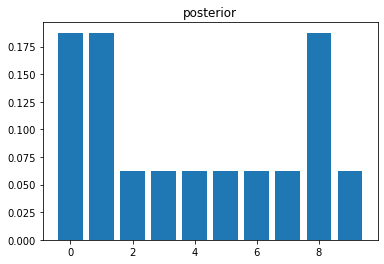

In [19]:
likelihood = likelihood_hallway(hallway, 1, 0.75)
posterior = normalize_discrete(likelihood * flat_belief)
plot_discrete_distribution(posterior, 'posterior')

In [15]:
print(normalize_discrete(np.array([2,4])))

[0.33333333 0.66666667]
